Direct Friends: {'Yanyan-Wang': ['Aarebecca', 'pomelo-nwu', 'Alice', 'Bob'], 'Aarebecca': ['Yanyan-Wang', 'pomelo-nwu'], 'pomelo-nwu': ['Yanyan-Wang', 'Aarebecca'], 'Alice': ['Yanyan-Wang'], 'Bob': ['Yanyan-Wang']}
Degrees: {'Yanyan-Wang': 4, 'Aarebecca': 2, 'pomelo-nwu': 2, 'Alice': 1, 'Bob': 1}
Top 5 by Degree: [('Yanyan-Wang', 4), ('Aarebecca', 2), ('pomelo-nwu', 2), ('Alice', 1), ('Bob', 1)]
Top 5 by Influence: [('Yanyan-Wang', 50.95), ('Alice', 45.67), ('Bob', 37.82), ('pomelo-nwu', 30.45), ('Aarebecca', 23.82)]
Top 5 by Combined Influence: [('Yanyan-Wang', 27.475), ('Alice', 23.335), ('Bob', 19.41), ('pomelo-nwu', 16.225), ('Aarebecca', 12.91)]
Recommended New Friends: []
Strength-Based Recommendations: [('Aarebecca', 25.3), ('pomelo-nwu', 25.09), ('Alice', 20.5), ('Bob', 18.0)]


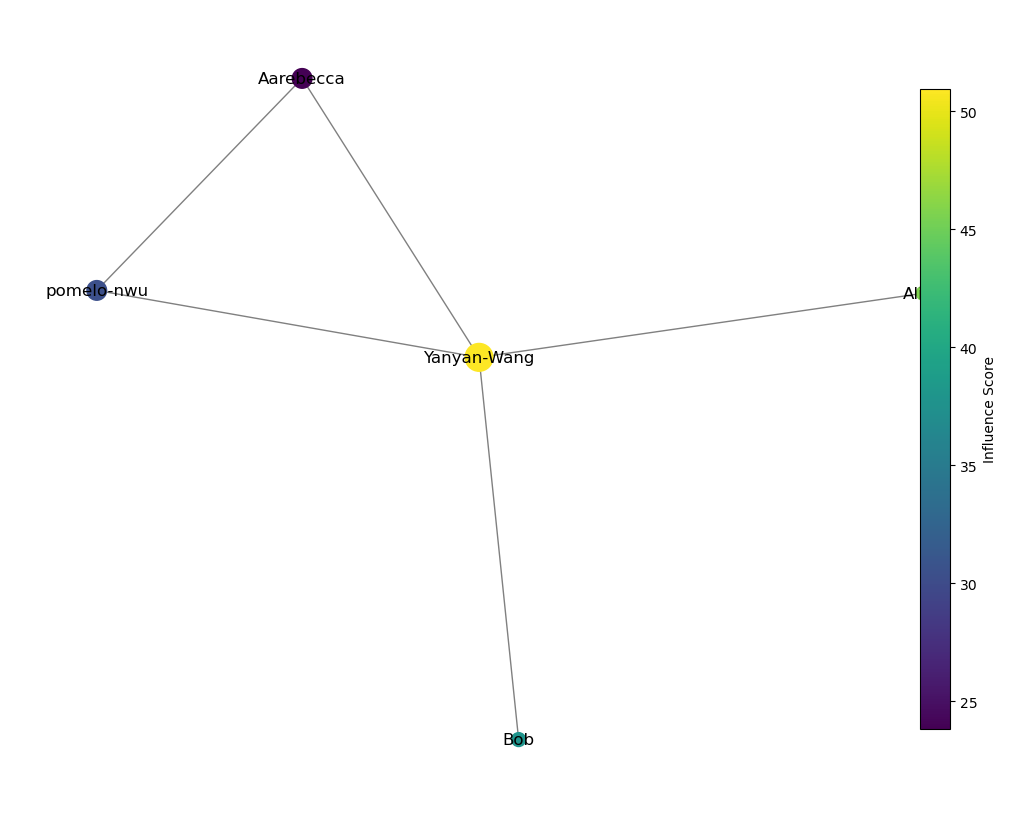

In [4]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# 加载数据（示例格式）
def load_data():
    nodes = [
        ["Yanyan-Wang", 50.95],
        ["Aarebecca", 23.82],
        ["pomelo-nwu", 30.45],
        ["Alice", 45.67],
        ["Bob", 37.82]
    ]
    edges = [
        ["Yanyan-Wang", "Aarebecca", 25.3],
        ["Yanyan-Wang", "pomelo-nwu", 25.09],
        ["Aarebecca", "pomelo-nwu", 15.0],
        ["Alice", "Yanyan-Wang", 20.5],
        ["Bob", "Yanyan-Wang", 18.0]
    ]
    return nodes, edges

# 使用邻接字典构建社交关系网络
def build_adjacency_dict(nodes, edges):
    adj_dict = defaultdict(dict)
    for edge in edges:
        user1, user2, weight = edge
        adj_dict[user1][user2] = weight
        adj_dict[user2][user1] = weight
    return adj_dict

# 查找每个用户的直接朋友
def find_direct_friends(adj_dict):
    direct_friends = {user: list(friends.keys()) for user, friends in adj_dict.items()}
    return direct_friends

# 计算每个用户的度数（直接朋友数量）
def calculate_degrees(adj_dict):
    degrees = {user: len(friends) for user, friends in adj_dict.items()}
    return degrees

# 获取度数最多的前5个用户
def find_top_users(data, key, top_n=5):
    sorted_users = sorted(data.items(), key=lambda x: x[1], reverse=True)
    return sorted_users[:top_n]

# 综合影响力得分和朋友数量计算影响力
def calculate_influence(nodes, degrees, weight_influence=0.5, weight_degree=0.5):
    influence_scores = {}
    for node in nodes:
        user, influence = node
        degree = degrees[user]
        influence_scores[user] = (weight_influence * influence + weight_degree * degree)
    return influence_scores

# 推荐Yanyan-Wang的“朋友的朋友”
def recommend_new_friends(user, adj_dict):
    direct_friends = set(adj_dict[user])
    potential_friends = defaultdict(int)

    for friend in direct_friends:
        for fof in adj_dict[friend]:
            if fof != user and fof not in direct_friends:
                potential_friends[fof] += 1

    recommended = sorted(potential_friends.items(), key=lambda x: x[1], reverse=True)
    return recommended

# 基于连接强度推荐
def recommend_by_strength(user, adj_dict):
    connections = [(friend, weight) for friend, weight in adj_dict[user].items()]
    recommended = sorted(connections, key=lambda x: x[1], reverse=True)
    return recommended[:5]

# 可视化社交网络图
def visualize_network(nodes, edges, degrees, influence_scores):
    G = nx.Graph()

    # 添加节点
    for node, score in nodes:
        G.add_node(node, influence=score, degree=degrees[node])

    # 添加边
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    # 节点的大小根据度数调整
    node_sizes = [G.nodes[node]['degree'] * 100 for node in G.nodes]
    node_colors = [G.nodes[node]['influence'] for node in G.nodes]

    plt.figure(figsize=(10, 8))

    # 创建可视化图
    nx.draw(G, with_labels=True, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, edge_color="gray")

    # 创建 ScalarMappable 对象，并为色条指定标签
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
    sm.set_array([])  # 空数组，用于colorbar的创建

    # 创建颜色条，并指定标签
    cbar_ax = plt.gcf().add_axes([0.91, 0.1, 0.03, 0.8])  # 指定颜色条的大小和位置
    plt.colorbar(sm, cax=cbar_ax, label="Influence Score")

    plt.show()


if __name__ == "__main__":
    # 加载数据
    nodes, edges = load_data()

    # 构建社交网络的邻接字典
    adj_dict = build_adjacency_dict(nodes, edges)

    # 查找每个用户的直接朋友
    direct_friends = find_direct_friends(adj_dict)
    print("Direct Friends:", direct_friends)

    # 计算每个用户的度数
    degrees = calculate_degrees(adj_dict)
    print("Degrees:", degrees)

    # 找出度数最多的前5个用户
    top_degrees = find_top_users(degrees, key=lambda x: x[1])
    print("Top 5 by Degree:", top_degrees)

    # 获取影响力分数
    influence_scores = {node[0]: node[1] for node in nodes}

    # 找出影响力最高的前5个用户
    top_influence = find_top_users(influence_scores, key=lambda x: x[1])
    print("Top 5 by Influence:", top_influence)

    # 综合影响力分数和朋友数量，找出最有影响力的前5个用户
    influence_with_degree = calculate_influence(nodes, degrees)
    top_influence_with_degree = find_top_users(influence_with_degree, key=lambda x: x[1])
    print("Top 5 by Combined Influence:", top_influence_with_degree)

    # 为Yanyan-Wang推荐新朋友
    recommendations = recommend_new_friends("Yanyan-Wang", adj_dict)
    print("Recommended New Friends:", recommendations)

    # 基于连接强度推荐
    strength_recommendations = recommend_by_strength("Yanyan-Wang", adj_dict)
    print("Strength-Based Recommendations:", strength_recommendations)

    # 可视化社交网络
    visualize_network(nodes, edges, degrees, influence_scores)
